# TEXT MINING for PRACTICE: word2vec
- gensim 패키지를 이용하여 영어 문서의 word2vec을 구해보자
---

## 1. 필요 패키지 설치 및 데이터 다운로드

In [228]:
import sys
!{sys.executable} -m pip install gensim newspaper3k nltk

In [6]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/seojungwon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/seojungwon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from newspaper import Article

## 2. 텍스트 데이터 다운로드

In [8]:
texts = []

url = 'https://en.wikipedia.org/wiki/China'
news = Article(url, language='en')
news.download()
news.parse()
texts.append(news.text)


url = 'https://en.wikipedia.org/wiki/Japan'
news = Article(url, language='en')
news.download()
news.parse()
texts.append(news.text)

## 3. 텍스트 전처리

In [9]:
common_texts = []
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

english_stop_list = list(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()
for text in texts :
    tokens = nltk.word_tokenize(text)
    pos_tagged = nltk.pos_tag(tokens)
    nouns = [lemmatizer.lemmatize(x[0]).lower() for x in pos_tagged if 'NN' in x[1] and x[0] not in english_stop_list and x[0].isalpha()]
    print(nouns)
    common_texts.append(nouns)

['republic', 'china', 'taiwan', 'us', 'china', 'disambiguation', 'prc', 'us', 'prc', 'disambiguation', 'country', 'east', 'asia', 'country', 'world', 'china', '中国', 'pinyin', 'zhōngguó', 'state', 'kingdom', 'people', 'republic', 'china', 'prc', 'country', 'east', 'asia', 'world', 'country', 'population', 'covering', 'kilometer', 'sq', 'mi', 'country', 'area', 'communist', 'party', 'china', 'state', 'jurisdiction', 'province', 'region', 'municipality', 'beijing', 'tianjin', 'shanghai', 'chongqing', 'region', 'hong', 'kong', 'macau', 'china', 'world', 'civilization', 'basin', 'yellow', 'river', 'north', 'china', 'plain', 'millennium', 'china', 'system', 'monarchy', 'dynasty', 'xia', 'dynasty', 'century', 'bce', 'china', 'time', 'century', 'bce', 'qin', 'core', 'china', 'empire', 'han', 'dynasty', 'bce', 'ce', 'technology', 'time', 'papermaking', 'compass', 'improvement', 'invention', 'gunpowder', 'type', 'tang', 'dynasty', 'northern', 'song', 'four', 'great', 'inventions', 'tang', 'cultu

['island', 'country', 'east', 'asia', 'japan', 'japanese', 'name', 'kanji', '日本国', 'hiragana', 'にっぽんこく', 'にほんこく', 'katakana', 'ニッポンコク', 'ニホンコク', 'kyūjitai', '日本國', 'transcriptions', 'romanization', 'hepburn', 'japan', '日本', 'nippon', 'ɲippoꜜɴ', 'nihon', 'ɲihoꜜɴ', '日本国', 'lit', 'japan', 'country', 'east', 'asia', 'pacific', 'ocean', 'coast', 'continent', 'stretch', 'sea', 'okhotsk', 'north', 'east', 'china', 'sea', 'philippine', 'sea', 'south', 'kanji', 'japan', 'name', 'origin', 'land', 'sun', 'japan', 'world', 'island', 'country', 'island', 'archipelago', 'island', 'honshu', 'hokkaido', 'kyushu', 'shikoku', 'okinawa', 'percent', 'japan', 'land', 'area', 'country', 'prefecture', 'region', 'hokkaido', 'northernmost', 'prefecture', 'okinawa', 'southernmost', 'prefecture', 'japan', 'island', 'country', 'population', 'world', 'people', 'city', 'countryside', 'people', 'tokyo', 'capital', 'japan', 'greater', 'tokyo', 'area', 'area', 'world', 'people', 'archaeological', 'research', 'japan', 

## 4. Word2Vec 생성

In [10]:
model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [12]:
print(model.wv.vector_size)
print(len(model.wv.vocab))

100
2993


In [18]:
model.wv["china"]

array([-0.00616438, -0.00302387,  0.00586075,  0.02350214, -0.00592914,
        0.01067434, -0.02181708,  0.00938908,  0.02404775,  0.00091419,
       -0.01338622,  0.00162406, -0.01246936,  0.01003236,  0.01072044,
       -0.00125103, -0.01615213,  0.02646719, -0.01247077, -0.00253318,
        0.00010297, -0.00752991,  0.00381965, -0.00217792, -0.0076795 ,
       -0.00847257,  0.00514209,  0.00674738,  0.01150642, -0.03636698,
       -0.00888575, -0.00970224,  0.04044705,  0.0001998 , -0.00404396,
       -0.0105148 ,  0.02514918,  0.01789597,  0.00615731, -0.05795322,
       -0.00858414, -0.01422396, -0.01753458,  0.00867387, -0.00702763,
        0.00121652,  0.00718249,  0.01544673, -0.00410219,  0.0098849 ,
       -0.00328561, -0.03091785, -0.00875783,  0.0111689 , -0.00864578,
        0.0136273 ,  0.0231644 , -0.02420197, -0.02440164,  0.00238253,
       -0.00396651, -0.01433706, -0.0085434 ,  0.01200327, -0.01346473,
        0.00174982, -0.00750866, -0.02482069,  0.01825345, -0.01

In [19]:
model.wv.similar_by_word("china")[:3]

[('japan', 0.9562327861785889),
 ('country', 0.951347291469574),
 ('world', 0.9354633092880249)]

In [20]:
model.wv.similar_by_word("japan")[:3]

[('china', 0.9562327861785889),
 ('country', 0.9078571796417236),
 ('people', 0.8996732831001282)]

In [21]:
model.wv.most_similar(positive=['japan', 'tokyo'], negative=['beijing'])

[('china', 0.7180201411247253),
 ('national', 0.708388090133667),
 ('government', 0.6993629932403564),
 ('market', 0.6866564154624939),
 ('time', 0.6806505918502808),
 ('number', 0.6792152523994446),
 ('world', 0.6778736114501953),
 ('people', 0.6762446165084839),
 ('country', 0.6729292273521423),
 ('growth', 0.6721223592758179)]

In [22]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
vocab = list(model.wv.vocab)[:50]
target_word = ["china", "japan", "beijing", "tokyo"]
vocab += target_word
vocab = list(set(vocab))
X = model.wv[vocab]

In [42]:
tsne = TSNE(n_components=2,random_state = 0)
X_tsne = tsne.fit_transform(X)

In [43]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

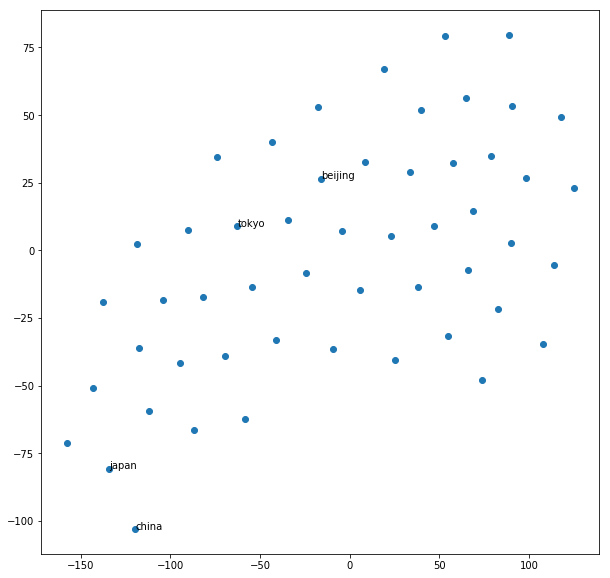

In [44]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    if word in target_word:
        ax.annotate(word, pos)
    else:
        ax.annotate("", pos)